In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
path = "/Users/younghyunkim/Desktop/dataproject/my_closet/00_raw_data"

In [4]:
df = pd.read_csv(f"{path}/closet_data_v3.csv")
df.head(3)

,제품명,계절,구매 년도,카테고리,구매처,브랜드 여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹,가격_bin,가격_q_bin,성공여부
0,배색 가디건 네이비,봄가을,2021,상의,1,0,1,네이비,3,0,일상,1,5,5,3,4.333333,블루 계열,1-4,매우 낮은 가격,1
1,배색 가디건 하늘,봄가을,2021,상의,0,0,1,스카이블루,3,0,일상,1,3,4,4,3.666667,블루 계열,1-4,매우 낮은 가격,1
2,줄무늬 티셔츠,봄가을,2014,상의,0,0,0,네이비,1,0,일상,1,4,5,4,4.333333,블루 계열,1-4,매우 낮은 가격,1


In [6]:
df.shape

(150, 20)

In [7]:
df['성공점수'].mean()

3.2177777777599985

In [8]:
df['성공점수'].median()

3.333333333

In [9]:
df['색상그룹'].mode()

0    블루 계열
Name: 색상그룹, dtype: object

<AxesSubplot:xlabel='성공점수', ylabel='Count'>

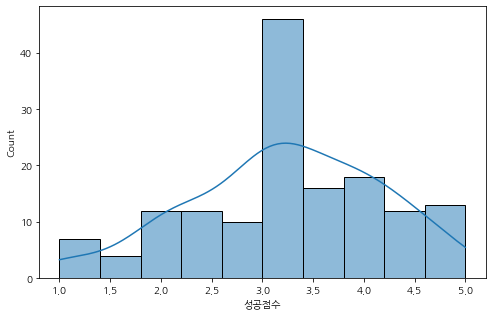

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(x = df['성공점수'], kde=True, bins=10)

In [12]:
import pingouin as pg

In [13]:
# 신뢰 구간 구하기
pg.ttest(df["성공점수"], 0, confidence=0.95)

/Users/younghyunkim/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/younghyunkim/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,41.591792,149,two-sided,6.749313e-84,"[3.06, 3.37]",3.395956,1.379e+80,1.0


In [14]:
import scipy 
scipy.stats.bootstrap([df['성공점수']], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.066666666624271, high=3.3688888888583985), standard_error=0.07747047025039168)

In [15]:
scipy.stats.bootstrap([df['성공점수']], np.median, confidence_level=0.99)

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.0, high=3.333333333), standard_error=0.1326432688684403)

## 정규성 검정
1. probplot (QQ-plot)
   참고링크:https://bongury.tistory.com/377
2. Kolmogorov-Smirnov Test
- 귀무가설은 정규분포를 따른다. p-value가 0.05이상인 경우 귀무가설을 기각할 수 없다.
   참고링크: https://blog.naver.com/PostView.naver?blogId=breezehome50&logNo=222339451767&redirect=Dlog&widgetTypeCall=true&directAccess=false
   


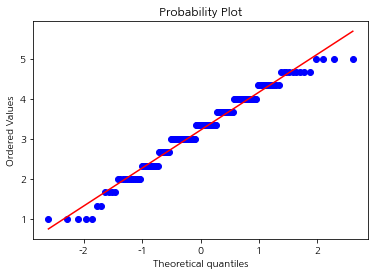

In [19]:
from scipy.stats import probplot

plt.figure()
probplot(df["성공점수"], plot=plt)
plt.show()

In [20]:
from scipy import stats
test_stat, p_val = stats.kstest(df["성공점수"], 'norm', args=(df["성공점수"].mean(), df["성공점수"].var()**0.5))
print("Test-statistics : {}, p-value:{}".format(test_stat, p_val))

Test-statistics : 0.10910930409593844, p-value:0.05205518728014469


In [21]:
from scipy import stats
test_stat, p_val = stats.shapiro(df["성공점수"])
print("Test-statistics : {}, p-value:{}".format(test_stat, p_val))

Test-statistics : 0.9722031354904175, p-value:0.003894209396094084


가격과 성공점수 상관 분석

<AxesSubplot:xlabel='가격', ylabel='성공점수'>

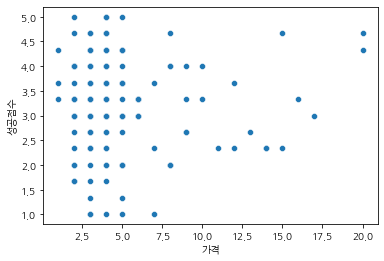

In [16]:
sns.scatterplot(x='가격', y='성공점수', data=df)

In [17]:
pg.corr(df['가격'], df['성공점수']) #표본상관계수 r값

,n,r,CI95%,p-val,BF10,power
pearson,150,-0.002021,"[-0.16, 0.16]",0.980416,0.102,0.049963


In [18]:
from statsmodels.formula.api import ols

통계적 가설 검증 (카테고리별 비교)

In [19]:
#카테고리별로 확인해보기
df_b = df[df['카테고리'] == '하의']
df_t = df[df['카테고리'] == '상의']
df_o = df[df['카테고리'] == '겉옷']
df_one = df[df['카테고리'] == '원피스']

In [20]:
# 하의는 입어보고 구매한 경우와 그렇지 않은 경우 두 집단은 같다
try_yes = df_b['성공점수'][df_b["구매 전 착용 여부"] == 1]
try_no = df_b['성공점수'][df_b["구매 전 착용 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.986901,24.380236,two-sided,0.333385,"[-0.44, 1.24]",0.374504,0.511,0.15685


In [21]:
# 겉옷은 입어보고 구매한 경우와 그렇지 않은 경우 두 집단의 성공점수 평균은 같다
try_yes = df_o['성공점수'][df_o["구매 전 착용 여부"] == 1]
try_no = df_o['성공점수'][df_o["구매 전 착용 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.445386,4.39668,two-sided,0.06511,"[-0.11, 2.35]",1.278543,2.794,0.61222


In [22]:
# 상의는 유행하는 디자인의 경우와 그렇지 않은 경우에도 두 집단의 성공점수 평균은 같다
trend_yes = df_t['성공점수'][df_t["유행 여부"] == 1]
trend_no = df_t['성공점수'][df_t["유행 여부"] == 0]
pg.ttest(trend_yes, trend_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.82953,17.825148,two-sided,0.084098,"[-1.12, 0.08]",0.617403,1.107,0.57093


In [23]:
# 원피스는 유행하는 디자인의 경우와 그렇지 않은 경우에도 두 집단의 성공점수 평균은 같다
trend_yes = df_one['성공점수'][df_one["유행 여부"] == 1]
trend_no = df_one['성공점수'][df_one["유행 여부"] == 0]
pg.ttest(trend_yes, trend_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.551741,1.631003,two-sided,0.152755,"[-4.49, 1.6]",1.598676,2.557,0.486092


In [24]:
# 겉옷은 브랜드가 있는 경우와 그렇지 않은 경우에도 두집단의 성공점수 평균은 같다
brand_yes = df_o['성공점수'][df_o["브랜드 여부"] == 1]
brand_no = df_o['성공점수'][df_o["브랜드 여부"] == 0]
pg.ttest(brand_yes, brand_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.063235,10.204251,two-sided,0.312189,"[-1.18, 0.42]",0.397457,0.621,0.118737


In [25]:
# 원피스는 브랜드가 있는 경우와 그렇지 않은 경우에도 두집단의 성공점수 평균은 같다
brand_yes = df_one['성공점수'][df_one["브랜드 여부"] == 1]
brand_no = df_one['성공점수'][df_one["브랜드 여부"] == 0]
pg.ttest(brand_yes, brand_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.156603,12,two-sided,0.269941,"[-0.55, 1.79]",0.61823,0.685,0.186843


In [26]:
# 구매처에 따른 두 집단의  성공점수 평균은 같다 
online = df['성공점수'][df["구매처"] == 1]
offline = df['성공점수'][df["구매처"] == 0]
pg.ttest(online, offline, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.380194,52.782408,two-sided,0.705327,"[-0.46, 0.31]",0.076696,0.218,0.068032
